In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

# Additional functions

In [2]:
def plot_TSP_solution(cities, permutation_method, opt_solution=None, **kwargs):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations, count = perform_annealing(distances, 
                                                                    altering_method=permutation_method, output_count=True, **kwargs)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    if opt_solution is not None:
        opt_line = [opt_solution for _ in range(len(cost_over_iterations))]
        plt.plot(opt_line, linestyle='--', color='black')
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()
    print('annealing iterations:', count)



def metrics(cities, permutation_method, print_results=True, **kwargs):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, _, _ = perform_annealing(distances, altering_method=permutation_method, **kwargs)

    best_tour_coordinates = tour_to_cities(best_tour, cities)

    if print_results:
        print('Method = \'%s\''%(permutation_method))
        print("Best distance:", best_tour_distance)
        print('With %i intersections \n'%(count_intersections(best_tour_coordinates)))
    
    return best_tour_distance, count_intersections(best_tour_coordinates)

def plot_dist_and_temp(costs, temps, title=None):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].set_title('Distance over iterations')
    axs[0].plot(costs)
    axs[1].set_title('Temperature')
    axs[1].plot(temps)
    if title is not None:
        fig.suptitle(title)
    plt.show()


def plot_comparison(results: dict, max_iterations_list, param_labels, opt_distance = None):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'darkgreen', 'magenta']

    for i, param_label in enumerate(param_labels):
        means = np.array([np.mean(elem) for elem in results[param_label]])
        stds = np.array([np.std(elem) for elem in results[param_label]])
        z_score = 1.96 

        conf_intervals = np.column_stack([
        means - z_score * (stds / np.sqrt(len(means))),
        means + z_score * (stds / np.sqrt(len(means)))
        ])

        lower_bounds = np.array([interval[0] for interval in conf_intervals])
        upper_bounds = np.array([interval[1] for interval in conf_intervals])

        plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=param_label)
        plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
    if opt_distance is not None:
        opt_distance_line = [opt_distance for _ in max_iterations_list]
        plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
        
    plt.title('Mean Distance over Number of Max Iterations')
    plt.xlabel('Max Iterations')
    plt.ylabel('Mean Distance')
    plt.legend()
    plt.show()

# Loading data

In [3]:
opt_distance_51, opt_distance_280, opt_distance_442 = calculate_optimal_distances()

cities_51 = load_graph('TSP-Configurations/eil51.tsp.txt')
cities_280 = load_graph('TSP-Configurations/a280.tsp.txt')
cities_442 = load_graph('TSP-Configurations/pcb442.tsp.txt')

distances_51 = calculate_distances(cities_51)
distances_280 = calculate_distances(cities_280)
distances_442 = calculate_distances(cities_442)

# Permutation operators

Averaged comparison between best results using different permutation operators

In [4]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')

methods = ['swap', 'insert', 'reverse']
num_runs = 50

kwargs_list = []
for method in methods:
    kwargs_list.append({   
            'num_runs': num_runs,
            'distances': distances_280,
            'altering_method': method,
            'max_iterations': int(1E6),
            'final_temp': 1E-10,
            'output': 'fitness_statistics'
        }
    )

output = run_concurrent(run_simulations, kwargs_list);

for (elem, method) in zip(output, methods):
    print(f'Mean distance using {method}: {elem[0]})')
    print('CI:', elem[2])
    print('Error:', elem[0] - opt_distance_280)
    print()


KeyboardInterrupt: 

In [47]:
""" A possible way to justify num_runs """

CI_radius_swap = (output[0][2][1] - output[0][2][0]) / 2
mean_distance_swap = output[0][0]
ratio_swap = CI_radius_swap / mean_distance_swap

CI_radius_insert = (output[1][2][1] - output[1][2][0]) / 2
mean_distance_insert = output[1][0]
ratio_insert = CI_radius_insert / mean_distance_insert

CI_radius_reverse = (output[2][2][1] - output[2][2][0]) / 2
mean_distance_reverse = output[2][0]
ratio_reverse = CI_radius_reverse / mean_distance_reverse

print(f'swap: CI_r / mean = {round(ratio_swap * 100, 5)}%')
print(f'insert: CI_r / mean = {round(ratio_insert * 100, 5)}%')
print(f'reverse: CI_r / mean = {round(ratio_reverse * 100, 5)}%')


swap: CI_r / mean = 1.14617%
insert: CI_r / mean = 1.13874%
reverse: CI_r / mean = 0.7227%


Best tour: [21 27 30 25  6 22 47  7 45 11 14 44 33 29 49 10 31  0 26 43 36 46 50  5
 42 23 13 24 12 18 39 40  3 17 16 41 32 38  9 48  4 37  8 19  2 35 34 28
 20 15  1]
Best distance: 608.1329336520885


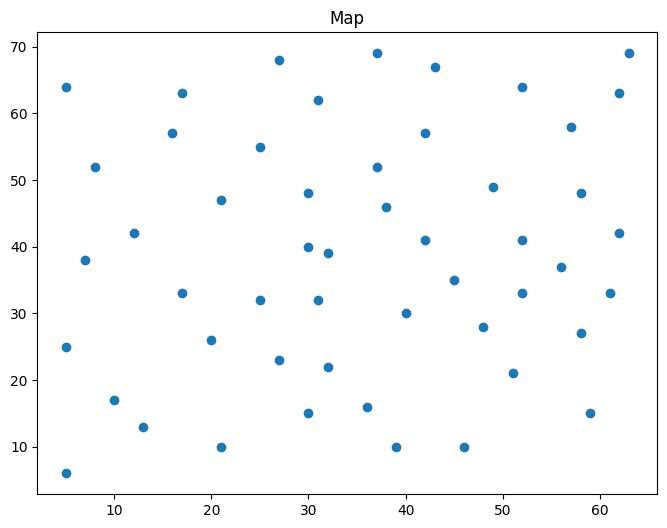

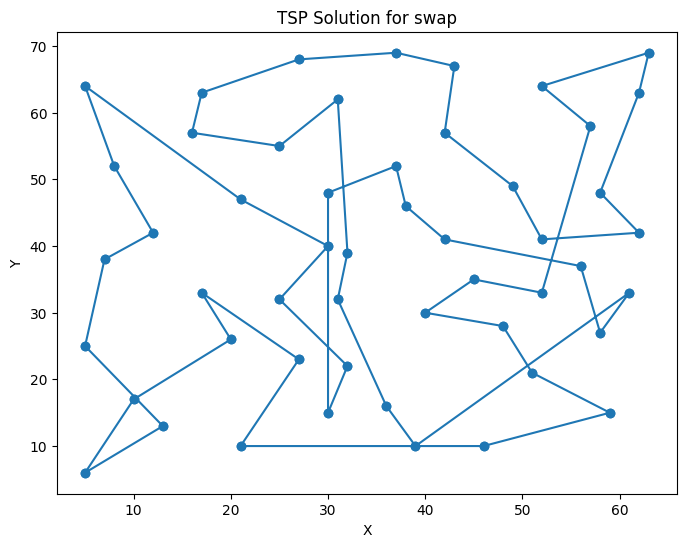

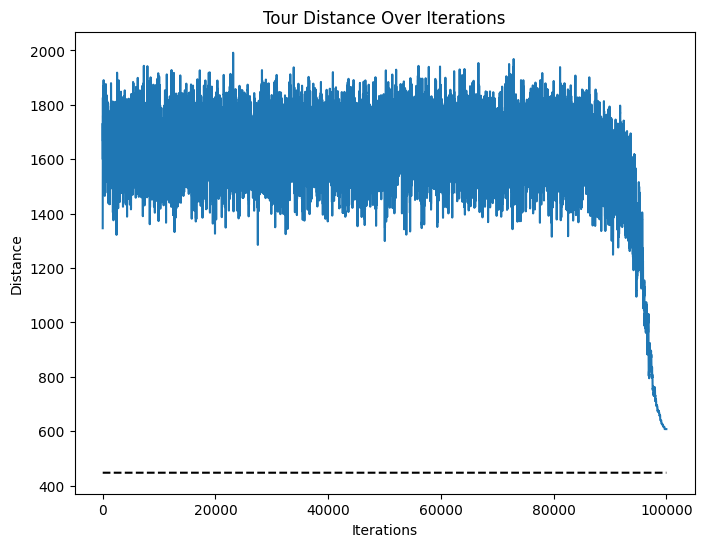

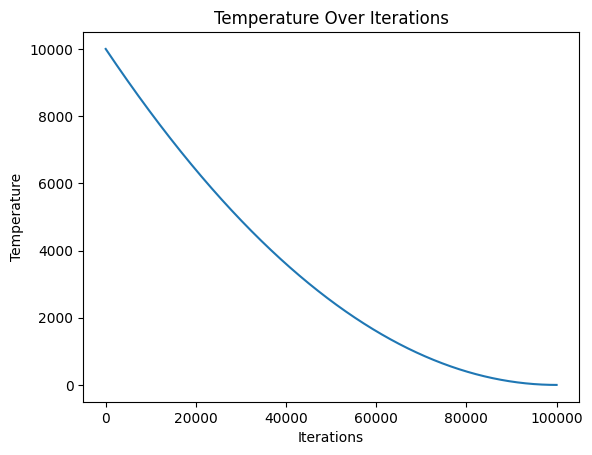

Best tour: [14, 44, 32, 38, 29, 33, 1, 31, 50, 45, 26, 5, 47, 6, 22, 42, 23, 13, 24, 12, 40, 39, 18, 41, 9, 48, 8, 49, 10, 0, 21, 7, 25, 30, 27, 2, 19, 35, 34, 28, 20, 15, 37, 4, 11, 46, 17, 3, 16, 36, 43]
Best distance: 494.03775412574925


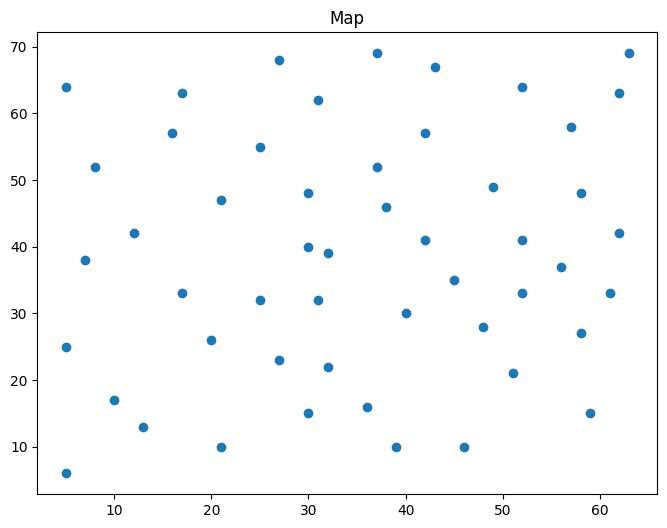

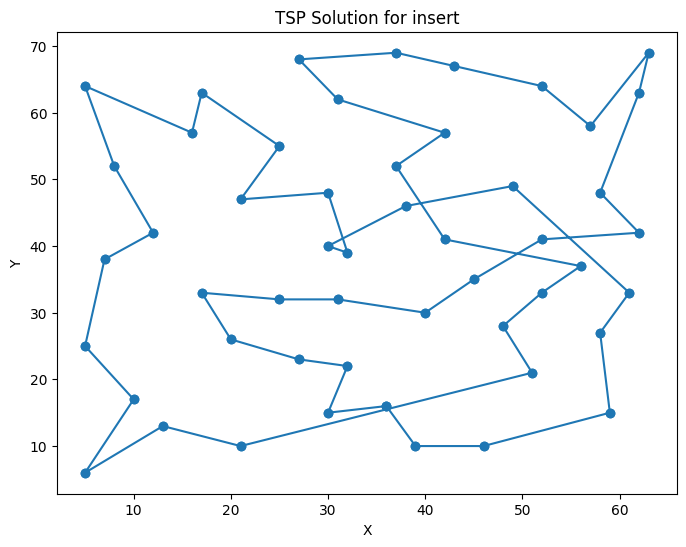

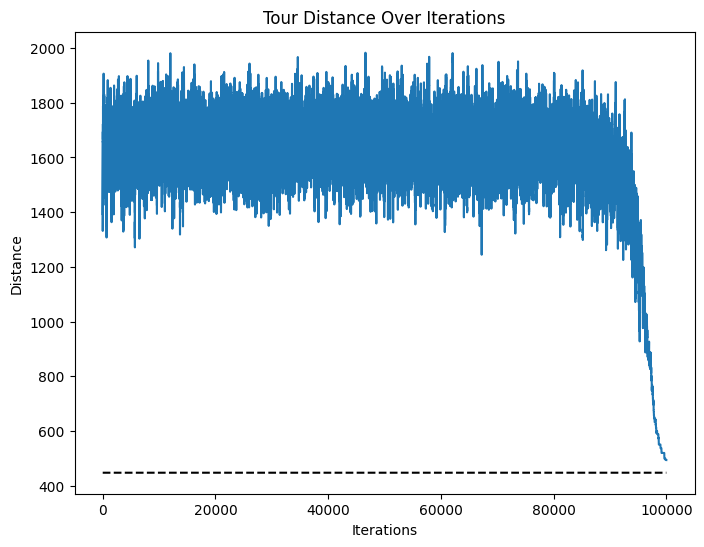

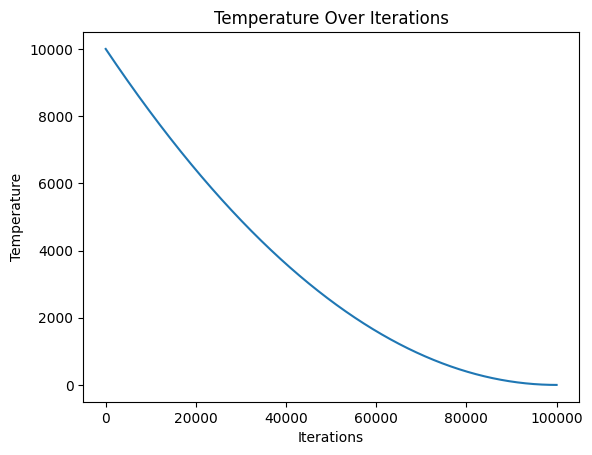

Best tour: [18 41 16 43 44 32 14 36 11  4 37  8 48  9 38 29 33 15 49 20 28  1 21  2
 19 34 35 27 30 25  6 42 23 22 47  5 26  7  0 31 10 45 50 46  3 17 13 24
 12 40 39]
Best distance: 475.73478653211424


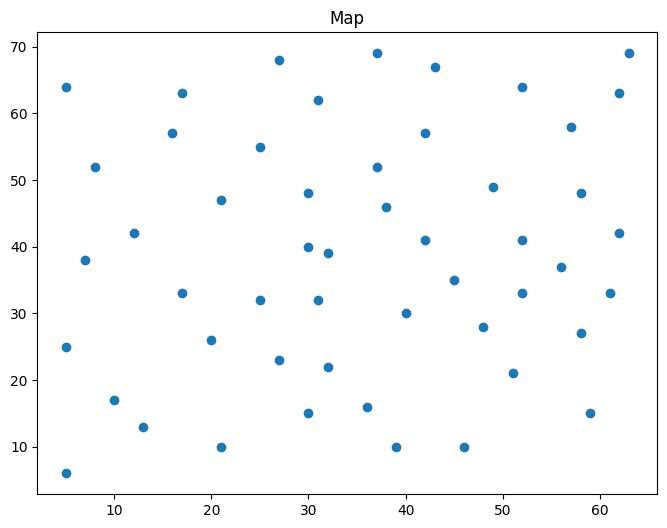

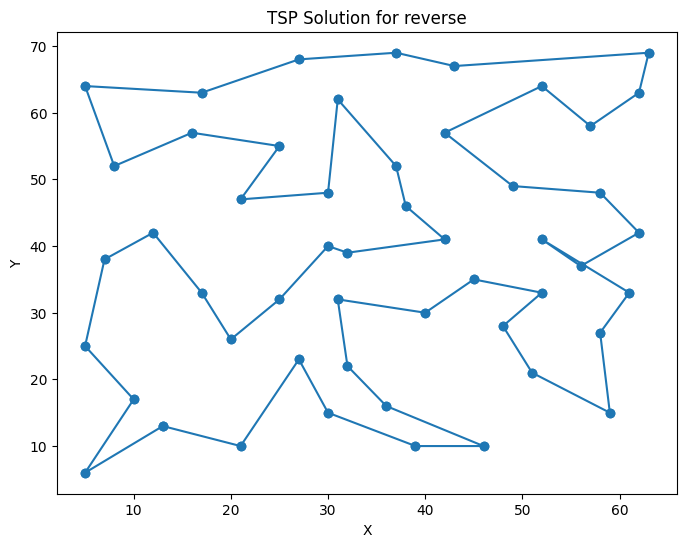

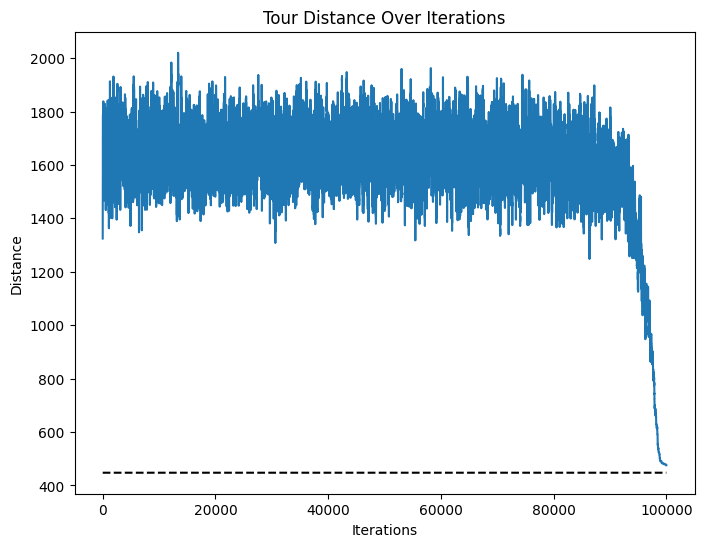

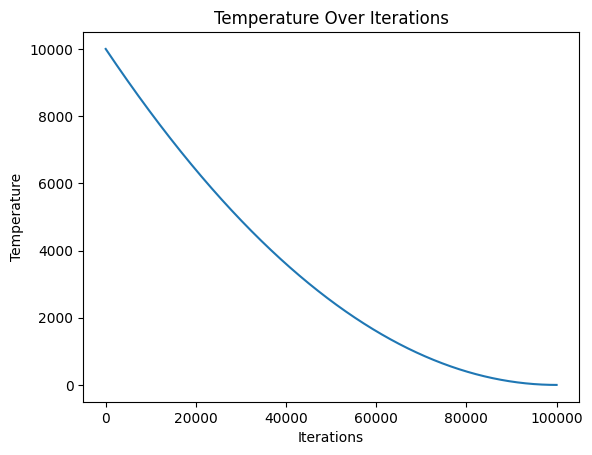

In [54]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

max_iterations = int(1E5) 
final_temp = 1E-6
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-7

plot_TSP_solution(cities, 'swap',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)
plot_TSP_solution(cities, 'insert',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)
plot_TSP_solution(cities, 'reverse',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha, opt_solution=opt_distance_51)

# Cooling schedules

cooling schedule:  linear_m
best_energy: 3608.772505482114
performed iterations: 50000


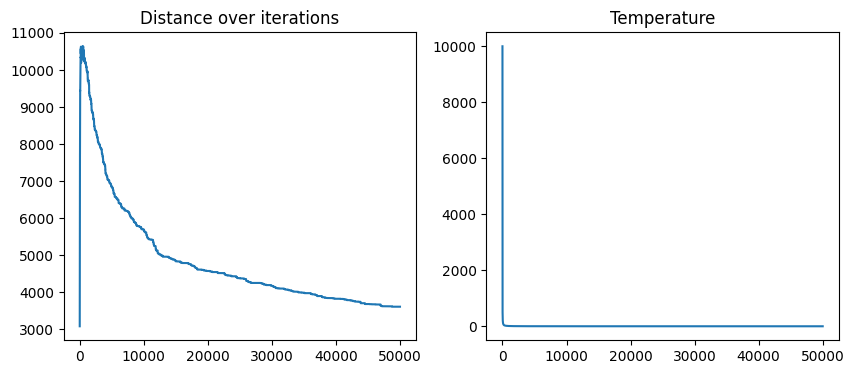

cooling schedule:  exponential_m
best_energy: 34780.66140608842
performed iterations: 50000


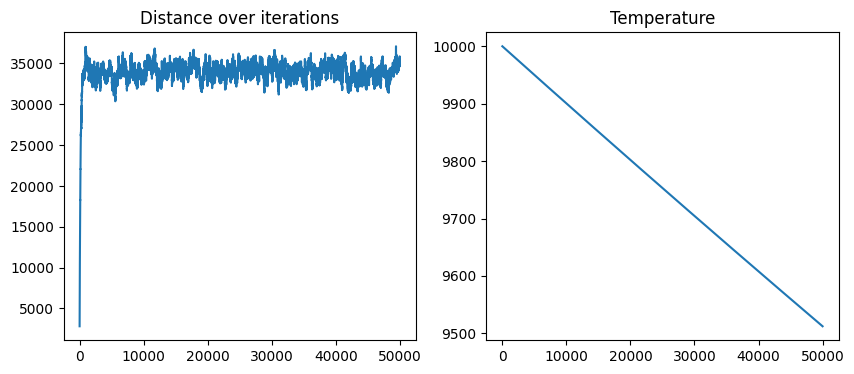

cooling schedule:  logarithmic_m
best_energy: 32548.510102333556
performed iterations: 50000


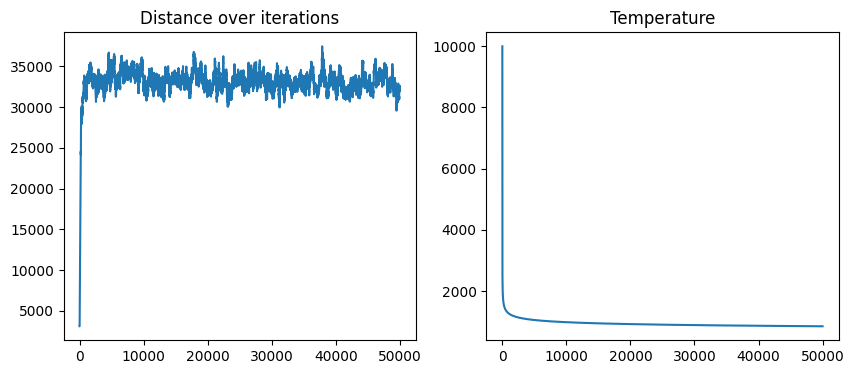

cooling schedule:  linear_a
best_energy: 22290.734738534044
performed iterations: 50000


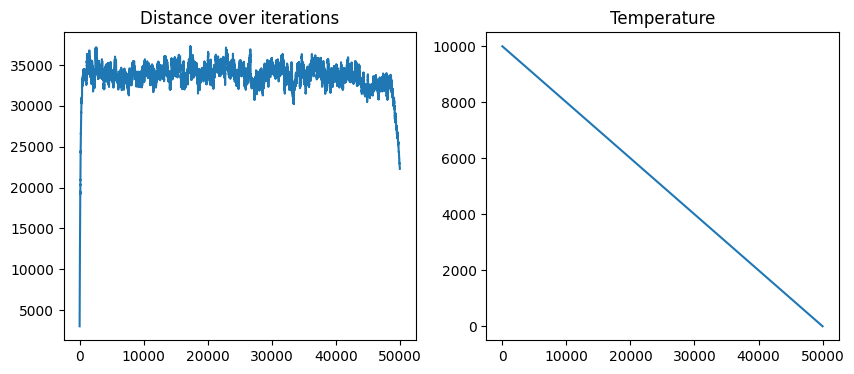

cooling schedule:  quadratic_a
best_energy: 10937.987742844653
performed iterations: 50000


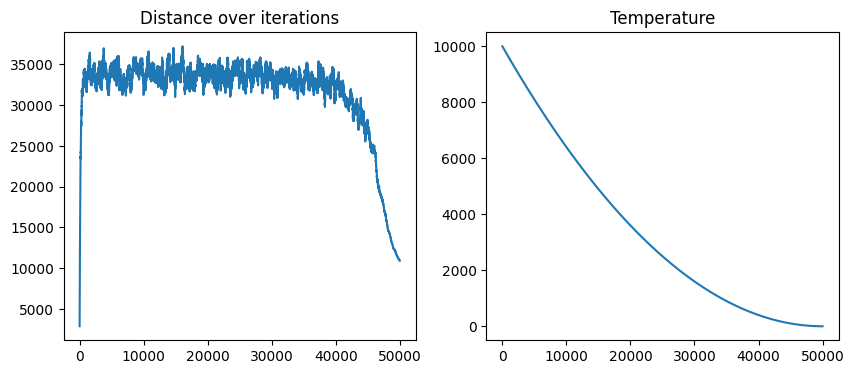

In [14]:
""" x axis values are not set """

schedules = ['linear_m', 'exponential_m', 'logarithmic_m', 'linear_a', 'quadratic_a']

for schedule in schedules:
    _ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-5,
                                                        alpha = 1 - 1E-6, chain_length=1, max_iterations=50000, output_count=True)
    print('cooling schedule: ', schedule)
    print('best_energy:', best_energy)
    print('performed iterations:', count)
    plot_dist_and_temp(costs, temps)

cooling schedule:  dynamic_m
best_energy: 5748.963081553041
performed iterations: 50000


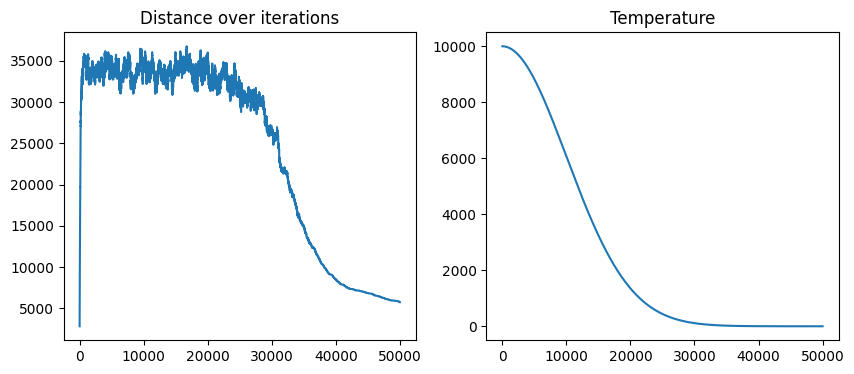

In [11]:
schedules = ['dynamic_m']

for schedule in schedules:
    _ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-7,
                                                        alpha = 1 - 1E-8, chain_length=1, max_iterations=50000, output_count=True)
    print('cooling schedule: ', schedule)
    print('best_energy:', best_energy)
    print('performed iterations:', count)
    plot_dist_and_temp(costs, temps)

cooling schedule:  quadratic_m
best_energy: 3035.946046355159
performed iterations: 3


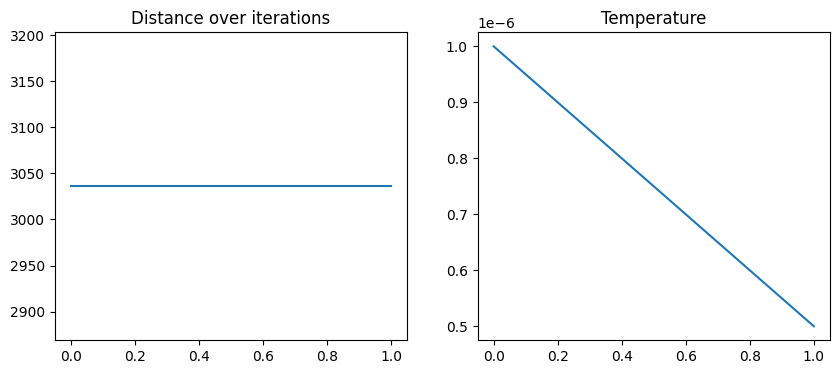

In [10]:
"""
broken
"""

schedules = ['quadratic_m']

for schedule in schedules:
    _ , best_energy, costs, temps, count = perform_annealing(distances=distances_280, cooling_schedule=schedule, final_temp=1E-6,
                                                        alpha = 1 - 1E-7, chain_length=1, max_iterations=50000, output_count=True)
    print('cooling schedule: ', schedule)
    print('best_energy:', best_energy)
    print('performed iterations:', count)
    plot_dist_and_temp(costs, temps)

# Chain length

# Max iterations analysis

In [13]:
distances = distances_280
max_iterations_list = range(100, 100000, 10000)
num_runs = 20
final_temp = 1E-7
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5
permutation_method = 'reverse'

opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

means, stds, conf_intervals = run_vary_maxiter_concurrent(num_runs, distances, max_iterations_list, altering_method = permutation_method,
                                                          final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)

Time taken with concurrency: 385.630309343338 seconds


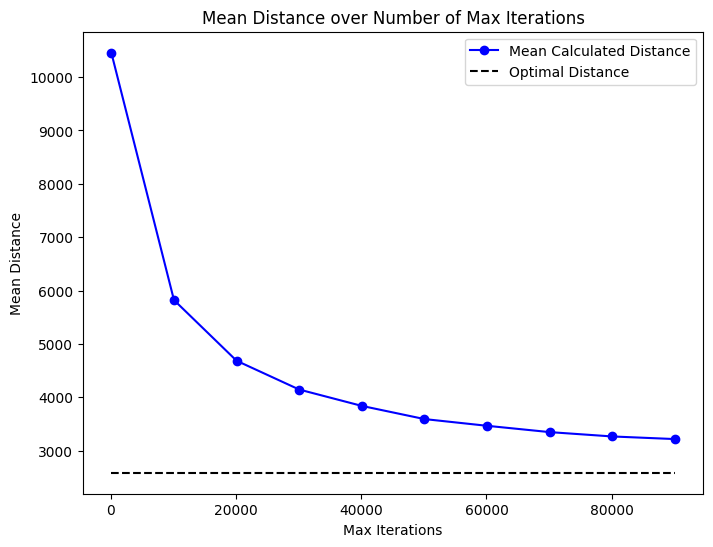

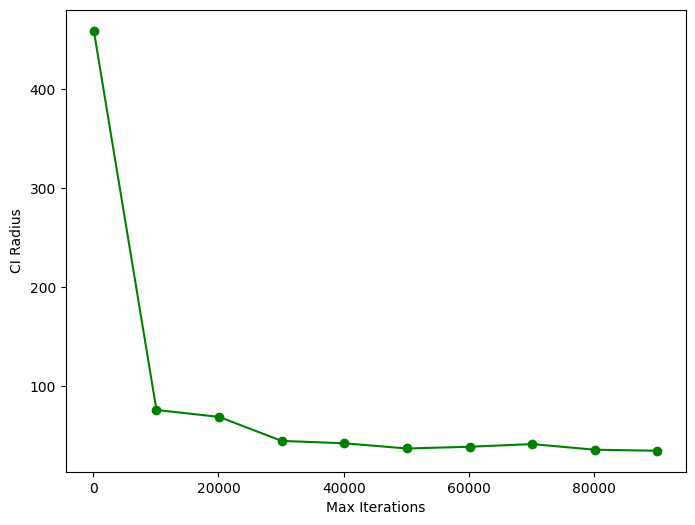

In [15]:
""" To be replaced soon """

means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])
ci_radius = (upper_bounds - lower_bounds) / 2

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Mean Calculated Distance')
plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, ci_radius, marker='o', linestyle='-', color='green')
plt.xlabel('Max Iterations')
plt.ylabel('CI Radius')
plt.show()



In [4]:
distances = distances_280
max_iterations_list = range(1, 30100, 5000)
num_runs = 30
final_temp = 1E-4
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5
permutation_methods = ['swap', 'insert', 'reverse']

results_vary_permutation = {} 

for perm_method in permutation_methods:
    print('running for perm_method:', perm_method)
    output = run_vary_maxiter_concurrent_sims(num_runs, distances, max_iterations_list, output='final_fitnesses', altering_method = perm_method,
                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)
    results_vary_permutation[perm_method] = output

running for perm_method: swap
Time taken (conc): 142.1532895565033
running for perm_method: insert
Time taken (conc): 101.40658807754517
running for perm_method: reverse
Time taken (conc): 148.5041229724884


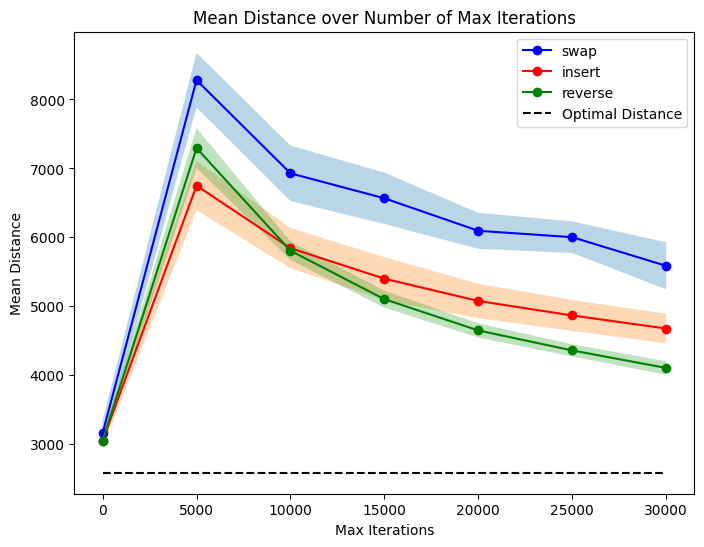

In [5]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

for i, perm_method in enumerate(permutation_methods):
    means = np.array([np.mean(elem) for elem in results_vary_permutation[perm_method]])
    stds = np.array([np.std(elem) for elem in results_vary_permutation[perm_method]])
    z_score = 1.96 

    conf_intervals = np.column_stack([
    means - z_score * (stds / np.sqrt(len(means))),
    means + z_score * (stds / np.sqrt(len(means)))
    ])

    lower_bounds = np.array([interval[0] for interval in conf_intervals])
    upper_bounds = np.array([interval[1] for interval in conf_intervals])

    plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=perm_method)
    plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(max_iterations_list, ci_radius, marker='o', linestyle='-', color='green')
# plt.xlabel('Max Iterations')
# plt.ylabel('CI Radius')
# plt.show()


In [6]:
for perm_method in permutation_methods:
    save_data(results_vary_permutation[perm_method], file_path=f'generated_data/dist_perm_operator-{perm_method}_maxiter{max_iterations_list[-1]}.csv', 
              column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

In [8]:
distances = distances_280
max_iterations_list = range(1, 20100, 5000)
num_runs = 30
final_temp = 1E-4
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5
chain_lengths = [1, 10, 20]

results_vary_chain_length = {} 

for chain_length in chain_lengths:
    print('running for chain_length:', chain_length)
    output = run_vary_maxiter_concurrent_sims(num_runs, distances, max_iterations_list, chain_length=chain_length, output='final_fitnesses',
                                                            final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)
    results_vary_chain_length[chain_length] = output

running for chain_length: 1
Time taken (conc): 77.98312783241272
running for chain_length: 10
Time taken (conc): 625.4001224040985
running for chain_length: 20
Time taken (conc): 1202.2773332595825


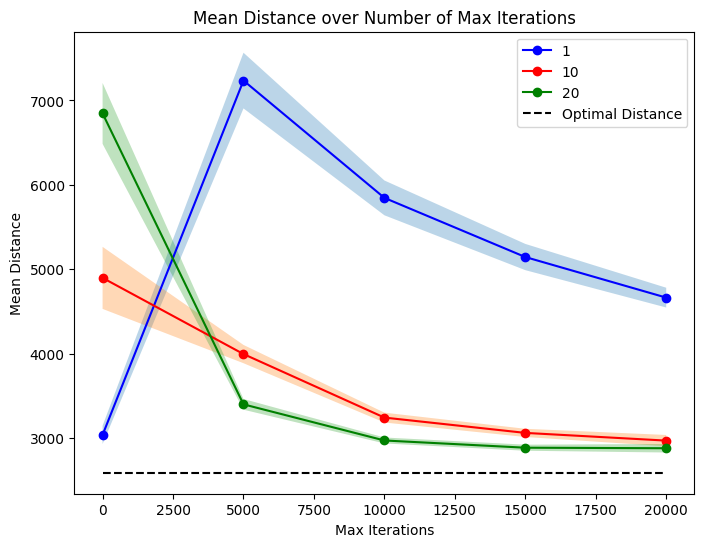

In [11]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, chain_length in enumerate(chain_lengths):
    means = np.array([np.mean(elem) for elem in results_vary_chain_length[chain_length]])
    stds = np.array([np.std(elem) for elem in results_vary_chain_length[chain_length]])
    z_score = 1.96 

    conf_intervals = np.column_stack([
    means - z_score * (stds / np.sqrt(len(means))),
    means + z_score * (stds / np.sqrt(len(means)))
    ])

    lower_bounds = np.array([interval[0] for interval in conf_intervals])
    upper_bounds = np.array([interval[1] for interval in conf_intervals])

    plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=chain_length)
    plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(max_iterations_list, ci_radius, marker='o', linestyle='-', color='green')
# plt.xlabel('Max Iterations')
# plt.ylabel('CI Radius')
# plt.show()


In [12]:
for chain_length in chain_lengths:
    save_data(results_vary_chain_length[chain_length], file_path=f'generated_data/dist_chain_length-{chain_length}_maxiter{max_iterations_list[-1]}.csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

In [14]:
distances = distances_280
max_iterations = 50000
num_runs_list = [5, 10, 20, 50, 100]
final_temp = 1E-4
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5

results_vary_numruns = {} 

for num_runs in num_runs_list:
    print('running for num_runs:', num_runs)
    output = run_simulations_concurrent(num_runs, distances, output='final_fitnesses', max_iterations=max_iterations,
                                                final_temp=final_temp, cooling_schedule=cooling_schedule, alpha=alpha)
    results_vary_numruns[num_runs] = output

running for num_runs: 5
running for num_runs: 10
running for num_runs: 20
running for num_runs: 50
running for num_runs: 100


In [ ]:
for num_runs in num_runs_list:
    save_data(results_vary_numruns[num_runs], file_path=f'generated_data/schedules/dist_chain_length-{num_runs}_maxiter{max_iterations_list[-1].csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

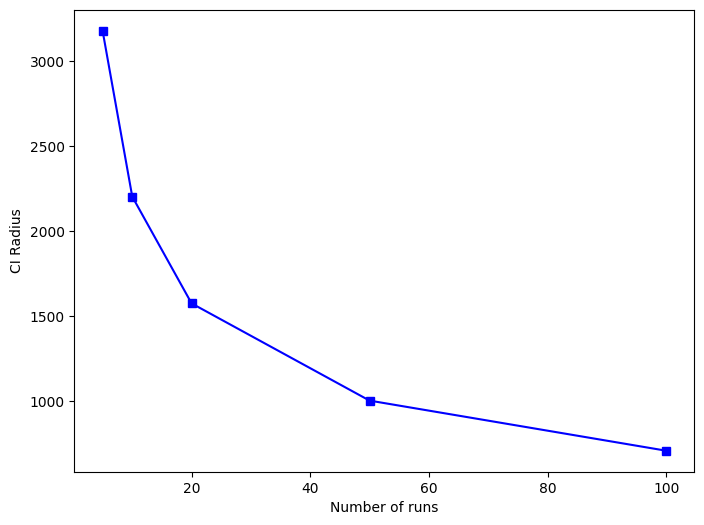

In [ ]:
plt.figure(figsize=(8, 6))

x, y = num_runs_list, []
for i, num_runs in enumerate(num_runs_list):
    mean = np.mean(results_vary_numruns[num_runs])
    std = np.mean(results_vary_numruns[num_runs])
    ci_radius = 1.96 * std / np.sqrt(len(results_vary_numruns[num_runs]))
    y.append(ci_radius)

plt.plot(x, y, 's-', color='blue')
    
plt.ylabel('CI Radius')
plt.xlabel('Number of runs')
plt.show()



In [5]:
# Run this cell for as long as possible, also run two next cells below

schedules = ['linear_a', 'linear_m', 'exponential_m', 'quadratic_a', 'dynamic_m', 'logarithmic_m']
max_iterations_list = range(1, 250200, 10000)
results_vary_schedules = {}
for schedule in schedules:
    output = run_vary_maxiter_concurrent(num_runs=30, distances=distances_280, max_iterations_list=max_iterations_list,
                                         output='final_fitnesses', cooling_schedule=schedule, final_temp=1E-4, alpha=1 - 1E-5)
    results_vary_schedules[schedule] = output

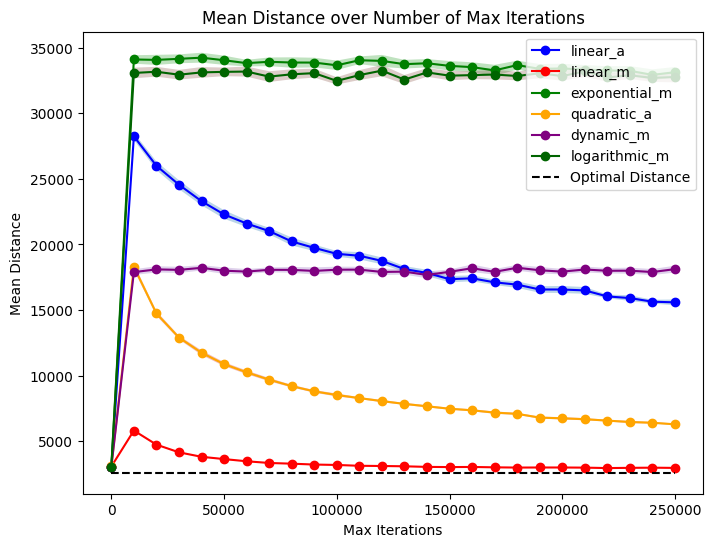

In [6]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'darkgreen', 'magenta']
for i, schedule in enumerate(schedules):
    means = np.array([np.mean(elem) for elem in results_vary_schedules[schedule]])
    stds = np.array([np.std(elem) for elem in results_vary_schedules[schedule]])
    z_score = 1.96 

    conf_intervals = np.column_stack([
    means - z_score * (stds / np.sqrt(len(means))),
    means + z_score * (stds / np.sqrt(len(means)))
    ])

    lower_bounds = np.array([interval[0] for interval in conf_intervals])
    upper_bounds = np.array([interval[1] for interval in conf_intervals])

    plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=schedule)
    plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
    
opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
plt.title('Mean Distance over Number of Max Iterations')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Distance')
plt.legend()
plt.show()

In [7]:
for schedule in schedules:
    save_data(results_vary_schedules[schedule], file_path=f'generated_data/schedules/dist_schedule-{schedule}_maxiter{max_iterations_list[-1]}.csv', 
            column_names=max_iterations_list, header='Distances (columns correspond to number of iterations)')

# MESA distance values

In [12]:
"""
Not correct yet
"""

distances = distances_280
max_iterations_list = range(1, 10000, 1000)
num_runs = 10
final_temp = 1E-4
cooling_schedule = 'linear_m'
alpha = 1 - 1E-5

results_mesa = {}

sa_output = run_vary_maxiter_concurrent_sims(num_runs=num_runs, distances=distances_280, max_iterations_list=max_iterations_list, output='final_fitnesses', 
                                                                            final_temp=final_temp, cooling_schedule='linear_m', alpha=alpha)

mesa_output = run_vary_maxiter_concurrent_sims(num_runs=num_runs, distances=distances_280, max_iterations_list=max_iterations_list, output='final_fitnesses', 
                                                                            final_temp=final_temp, cooling_schedule='linear_m', alpha=alpha, mesa=True)

results_mesa['SA'] = sa_output
results_mesa['MESA'] = mesa_output

KeyboardInterrupt: 

In [ ]:
plot_comparison(results_mesa, max_iterations_list, ['SA', 'MESA'], opt_distance_280)

KeyError: 'SA'

<Figure size 800x600 with 0 Axes>

# Results of the best model